In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pol = pd.read_csv('25_Complaints_against_police.csv')
pol.head(5)

,Area_Name,Year,Sub_group,CPA_-_Cases_Registered,CPA_-_Cases_Reported_for_Dept._Action,CPA_-_Complaints/Cases_Declared_False/Unsubstantiated,CPA_-_Complaints_Received/Alleged,CPA_-_No_of_Departmental_Enquiries,CPA_-_No_of_Magisterial_Enquiries,CPA-_Cases_Sent_for_Trials/Charge-sheeted,...,CPB_-_Police_Personnel_Convicted,CPB_-_Police_Personnel_sent_up_for_Trial,CPB_-_Police_Personnel_Trial_Completed,CPB-_Police_Personnel_Cases_Withdrawn_or_Otherwise_disposed_of,CPC_-_Police_personnel_Cases_Trial_Completed,CPC_-_Police_Personnel_Cases_Withdrawn_or_Otherwise_disposed_of,CPC_-_Police_Personnel_Disciplinary_Action_Initiated,CPC_-_Police_Personnel_Dismissal/Removal_from_Service,CPC_-_Police_Personnel_Major_Punishment_awarded,CPC_-_Police_Personnel_Minor_Punishment_awarded
0,Andaman & Nicobar Islands,2001,Complaints Against Police Personnel,10,4,0,10,4,0,5,...,0,5,1,0,6,25,73,2,11,20
1,Andhra Pradesh,2001,Complaints Against Police Personnel,3078,72,109,3229,160,2969,3039,...,3,92,15,16,23,476,1506,47,248,1085
2,Arunachal Pradesh,2001,Complaints Against Police Personnel,24,39,5,54,44,0,17,...,0,17,0,1,8,43,107,4,17,15
3,Assam,2001,Complaints Against Police Personnel,17,3,1,52,52,3,9,...,0,7,1,1,0,7,144,5,61,102
4,Bihar,2001,Complaints Against Police Personnel,1,1,12,125,3,15,18,...,0,81,0,6,537,141,1385,33,470,1557


In [11]:
pol['Area_Name'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [38]:
AWCR = {}
for i in pol['Area_Name'].unique():
    AWCR[i] = pol.loc[pol['Area_Name'] == i, 'CPA_-_Cases_Registered'].sum()
AWCR
Area_Wise_Complaint_Registered = pd.DataFrame(AWCR, columns=pol['Area_Name'].unique(), index=range(len(pol['Area_Name'].unique())))

Area_Wise_Complaint_Registered = Area_Wise_Complaint_Registered.iloc[0,:]
Area_Wise_Complaint_Registered.sort_values()

Daman & Diu                      0
Dadra & Nagar Haveli             2
Lakshadweep                      2
Manipur                          9
Chandigarh                      21
Puducherry                      32
Mizoram                         41
Goa                             50
Meghalaya                       59
Arunachal Pradesh              119
Nagaland                       126
Tripura                        134
Sikkim                         138
Assam                          150
Andaman & Nicobar Islands      154
Uttarakhand                    168
West Bengal                    299
Bihar                          310
Haryana                        457
Jammu & Kashmir                682
Chhattisgarh                   797
Karnataka                      809
Delhi                         1013
Kerala                        1055
Rajasthan                     1216
Tamil Nadu                    1328
Punjab                        1523
Himachal Pradesh              2544
Gujarat             

We see that Daman & DIU has 0 cases registered against Police and Uttar Pradesh has highest number of cases registered against Police, but since there is a very huge population in UP so we can't yet say that cases registered are more per person per police personnel in a state.

In [39]:
pol['Cases_Deemed_Valid'] = pol['CPA_-_Cases_Registered'] - pol['CPA_-_Complaints/Cases_Declared_False/Unsubstantiated']

In [40]:
AWCR = {}
for i in pol['Area_Name'].unique():
    AWCR[i] = pol.loc[pol['Area_Name'] == i, 'Cases_Deemed_Valid'].sum()
AWCR
Area_Wise_Complaint_Deemed_Valid = pd.DataFrame(AWCR, columns=pol['Area_Name'].unique(), index=range(len(pol['Area_Name'].unique())))

Area_Wise_Complaint_Deemed_Valid = Area_Wise_Complaint_Deemed_Valid.iloc[0,:]
Area_Wise_Complaint_Deemed_Valid.sort_values()

Madhya Pradesh              -106820
Maharashtra                  -27876
Punjab                       -24934
Kerala                       -15904
Chhattisgarh                 -12919
Rajasthan                    -12768
Haryana                      -10987
Uttar Pradesh                 -7028
Delhi                         -5671
Uttarakhand                   -4136
Jammu & Kashmir               -2726
Chandigarh                    -1077
Gujarat                        -831
Goa                            -173
Daman & Diu                       0
Dadra & Nagar Haveli              2
Lakshadweep                       2
Manipur                           9
Andaman & Nicobar Islands        15
Puducherry                       29
Mizoram                          41
Meghalaya                        59
Arunachal Pradesh               114
Tripura                         115
Nagaland                        125
Sikkim                          133
Assam                           137
Bihar                       

Don't understand why there are some negative cases, as we have seen the number of cases deemed false are more then number of cases registered.

Cases deemed valid are most in Andhra then in Jharkhand and in UP which was topper in number of cases falls far behind in numbe rof valid cases, which i believe is a good thing.

In [41]:
pol['Enquired_Upon_Cases'] = pol['CPA_-_No_of_Departmental_Enquiries'] + pol['CPA_-_No_of_Magisterial_Enquiries'] + pol['CPA-_Cases_Sent_for_Trials/Charge-sheeted']

In [42]:
AWCR = {}
for i in pol['Area_Name'].unique():
    AWCR[i] = pol.loc[pol['Area_Name'] == i, 'Enquired_Upon_Cases'].sum()
AWCR
Area_Wise_Enquired_Upon_Cases = pd.DataFrame(AWCR, columns=pol['Area_Name'].unique(), index=range(len(pol['Area_Name'].unique())))

Area_Wise_Enquired_Upon_Cases = Area_Wise_Enquired_Upon_Cases.iloc[0,:]
Area_Wise_Enquired_Upon_Cases.sort_values()

Lakshadweep                      1
Dadra & Nagar Haveli             2
Daman & Diu                      2
Manipur                         13
Puducherry                      22
Goa                             44
Mizoram                         66
Meghalaya                       91
Nagaland                       114
Andaman & Nicobar Islands      139
Sikkim                         158
Himachal Pradesh               247
Tripura                        316
Assam                          400
Bihar                          570
Chandigarh                     607
Arunachal Pradesh              631
West Bengal                    932
Jharkhand                     1394
Odisha                        2477
Karnataka                     3664
Rajasthan                     3938
Tamil Nadu                    4008
Delhi                         5055
Jammu & Kashmir               6058
Haryana                       6589
Uttarakhand                   7599
Gujarat                       7927
Chhattisgarh        

Madhya Pradesh has higheat number of cases enquired upon(magesterial, departmental or Charge sheeted/ trialled cases), which clearly says that MP police department are most serious in context of cases filed against them. Followed by UP followed by AP.

In [47]:
pol['Number_Punishments_Rewarded'] = pol['CPC_-_Police_Personnel_Dismissal/Removal_from_Service'] + pol['CPC_-_Police_Personnel_Major_Punishment_awarded'] + pol['CPC_-_Police_Personnel_Minor_Punishment_awarded']
group_AW = pol.groupby('Area_Name')
group_AW

In [57]:
for Area, AreaDF in group_AW:
    print(Area)
    #print(AreaDF)

Andaman & Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra & Nagar Haveli
Daman & Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu & Kashmir
Jharkhand
Karnataka
Kerala
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Tripura
Uttar Pradesh
Uttarakhand
West Bengal


In [84]:
group_AW['Number_Punishments_Rewarded'].sum().sort_values()

Area_Name
Lakshadweep                      0
Dadra & Nagar Haveli             0
Daman & Diu                      1
Manipur                          5
Nagaland                        32
Puducherry                      80
Mizoram                         97
Sikkim                         143
Arunachal Pradesh              297
Andaman & Nicobar Islands      380
Himachal Pradesh               542
Haryana                        561
Meghalaya                      888
Goa                            890
Chandigarh                    1111
Assam                         1196
Chhattisgarh                  1262
Tripura                       1990
Uttarakhand                   2960
West Bengal                   3076
Odisha                        3128
Madhya Pradesh                3241
Kerala                        3480
Jharkhand                     3594
Karnataka                     6534
Bihar                         7838
Tamil Nadu                   12818
Gujarat                      13791
Andhra Pra

Worst police personnels are in Punjab

In [87]:
pol.dtypes

Area_Name                                                          object
Year                                                                int64
Sub_group                                                          object
CPA_-_Cases_Registered                                              int64
CPA_-_Cases_Reported_for_Dept._Action                               int64
CPA_-_Complaints/Cases_Declared_False/Unsubstantiated               int64
CPA_-_Complaints_Received/Alleged                                   int64
CPA_-_No_of_Departmental_Enquiries                                  int64
CPA_-_No_of_Magisterial_Enquiries                                   int64
CPA-_Cases_Sent_for_Trials/Charge-sheeted                           int64
CPA-_No_of_Judicial_Enquiries                                       int64
CPB_-_Police_Personnel_Acquitted                                    int64
CPB_-_Police_Personnel_Convicted                                    int64
CPB_-_Police_Personnel_sent_up_for_Tri

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
pol['Area_Name'] = le.fit_transform(pol['Area_Name'])
pol.dtypes

Area_Name                                                           int32
Year                                                                int64
Sub_group                                                          object
CPA_-_Cases_Registered                                              int64
CPA_-_Cases_Reported_for_Dept._Action                               int64
CPA_-_Complaints/Cases_Declared_False/Unsubstantiated               int64
CPA_-_Complaints_Received/Alleged                                   int64
CPA_-_No_of_Departmental_Enquiries                                  int64
CPA_-_No_of_Magisterial_Enquiries                                   int64
CPA-_Cases_Sent_for_Trials/Charge-sheeted                           int64
CPA-_No_of_Judicial_Enquiries                                       int64
CPB_-_Police_Personnel_Acquitted                                    int64
CPB_-_Police_Personnel_Convicted                                    int64
CPB_-_Police_Personnel_sent_up_for_Tri

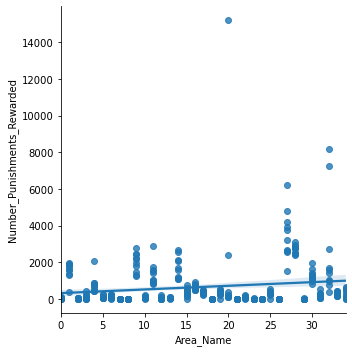

In [91]:
sns.lmplot(x='Area_Name', y='Number_Punishments_Rewarded', data=pol)